## **Lab 06 - Cost Functions & Parameter Space**

##### Paige Rosynek - 10.25.2022

### **Introduction**

The purpose of this lab is to explore cost functions and how they are used within the parameter space to find the parameters that produce the best model. We will implement a Gaussian Distribution model as well as a liner model in this lab; for each model, the chosen cost function is mean-squared error. In each of the experiments, we will be performing Grid Search to search the parameter space of each model to find the parameters that produce the minimum error. The Gaussian model has two parameters: the mean $\mu$ and the standard deviation $\sigma$, thus it is a 2-dimensional model. The linear model takes in an feature matrix with 4 features, so it is a 4-dimensional model. Overall, in this lab we will be focusing on exploring and visualizing parameter space for various models as well as observing the effects high-dimensional data has on grid search.

### **Questions**

##### 1. By looking at the provided cost_functions.py, use 1-2 sentences to describe in detail the purpose of each of the methods. To guide this description, discuss the method input, method output, and what function each method serves for the cost function.

The parameters of the cost functions is the model parameters to use to predict the response value of each row of the feature matrix. Then the functions calculate the mean squared error between the true responses and the model predictions.

##### 2. For the heatmaps that you generated for this lab, what do they describe? What do the “valleys” and “peaks” of this heat map represent?

The heatmaps describe the model error for each set of parameters, for gaussian: $\mu , \sigma$ and for linear: weights $[w_0, w_1, w_2, w_3]$, which is represented by the color of the plot. In the heatmaps, darker colors correspond to smaller error values and lighter values correspond to larger error values. The darkest regions of the heatmaps represent the "valleys" of our parameter space which are the parameter combinations that produce the minimum error between the model predictions and true values given a set of parameters. The lightest regions of the heatmap represents the "peaks" of our parameter space which are the model parameter sets that produce the maximum error.

##### 3. For experiment 2, you increased the number of samples within the specified range. 

1. Describe how the heatmap representation changed due to this increase in sampling. 

    When we increased the sampling within the range, the heatmap for the model was simpler and the valley was more obvious. Increasing the sampling within a range "focuses" the parameter space on the specific range and produces more detail due to samples being closer together. 

2. What benefit did this higher sampling rate have for finding the set of parameters with the minimum error? 

    The higher sampling rate allowed us to find a better set of parameters that minimized the error. This was due to the fact that a increasing the sampling rate within a specific range produces values that are closer together and that have more precision.

3. Was this sampling rate high enough? Defend your answer!

    The sampling rate used for the second step of experiment 2 produced a generally low error that would be acceptable for most contexts. However, whether or not the sampling rate was high enough would depend on the context of the problem and whether an error of approximately 1% is acceptable for the problem specifications.

##### 4. The Gaussian distribution model is limited to two dimensions while the multivariate linear model implemented for this lab is 4 dimensional. 

1. Describe a limitation of the grid search method as you add additional dimensions. Hint: Think about the time complexity required for the grid search as you add additional dimensions. 

    Grid search is computationally expensive. With m number of features and p number of grid points, grid search evaluates $p^m$ points. In other words, the run time for grid search grows exponentially for each additional dimension.

2. With time complexity in mind, can you derive a rule (mathematical expression) to estimate how many grid points are needed to evaluate all combination of parameters based on the number of dimensions. 

    The big-$O$ time complexity for evaluating $p$ grid points with $m$ features would be $O(p^m)$.

3. With this rule, compare 2-dimensional models with 4-dimensional models. 10-dimensional? 100-dimensional?

    Where $n$ is the number of grid points:

    - 2-D model time complexity: $n^2$
    - 4-D model time complexity: $n^4$
    - 10-D model time complexity: $n^{10}$
    - 100-D model time complexity: $n^{100}$


##### 5. In experiment 3 you plotted the line of identity in the figure that compared the given response variable to the model prediction. 

1. What does this line represent and how is it useful? 

    The line of identity represents where the cost function (MSE) is equal to zero. We can interpret the points that are closer to the line of identity have a lower error and points that are farther from the line have a higher error or cost.

2. What does it mean for a value to lie above the line? Below the line? 

    If a value lies on the line of identity it means that the parameters that produced the model predicition on the line has an error of 0 and the model predicted the correct value. If a point is above the line, then the predicted value was greater than the actual value and if a point is below the line, then the predicted value was less than the actual value.

3. How would predictions that perfectly replicate the given data appear in this plot?

    The plot of predictions that prefectly replicate the given data would consist of all data points lying on the line of identity.

##### 6. What are the weaknesses of grid search? Why wouldn't we want to use it?

The biggest weakness of Grid Search is that it is computationally expensive. The run time for grid search grows exponentially as you increase the number of features or dimensions. In addition, it can be difficult to choose a specific range of values to search in the parameter space to find the optimal parameters due to the possiblity of multiple extrema existing in the parameter space.

### Import Libraries

In [1]:
import numpy as np
import cost_functions as cf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### Test Cost Functions

In [2]:
!python test_cost_functions.py

......
----------------------------------------------------------------------
Ran 6 tests in 0.011s

OK


### **Experiment 1 - Coarse Grid Search (Gaussian Distribution)**

#### 1. Load gaussdist.csv

In [3]:
gdist = np.loadtxt('../Data/gaussdist.csv', delimiter=',')

#### 2. Identify the independent & dependent variables (columns)

The first column of the gaussian data is the feature (independent variable) and the second column is the response (dependent variable). 

#### 3. Store the features & responses in numpy arrays

In [4]:
X = gdist[:, 0]
y_true = gdist[:, 1]

#### 4. Instantiate your cost function class for GaussianCostFunction using the provided data

In [5]:
gaussian_cf = cf.GaussianCostFunction(X, y_true)

#### 5. Plot the feature (x-axis) versus the response (y-axis) of the gaussdist.csv dataset

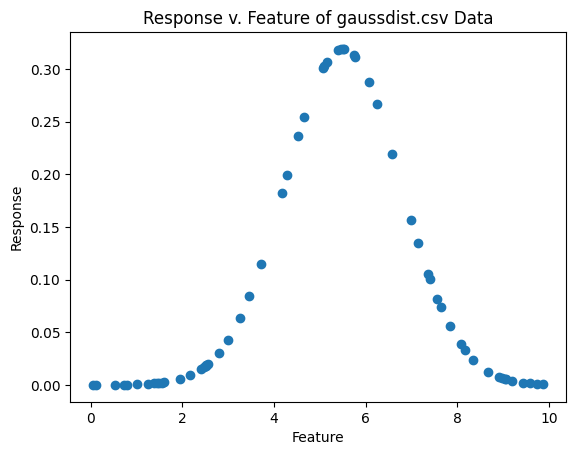

In [6]:
plt.scatter(X, y_true)
plt.xlabel('Feature')
plt.ylabel('Response')
plt.title('Response v. Feature of gaussdist.csv Data')
plt.show()

#### 6. Use the parameter set ($\mu=1$ and $\sigma=0.75$) and the _predict method to generate your model predictions and plot them on the same plot as the original data

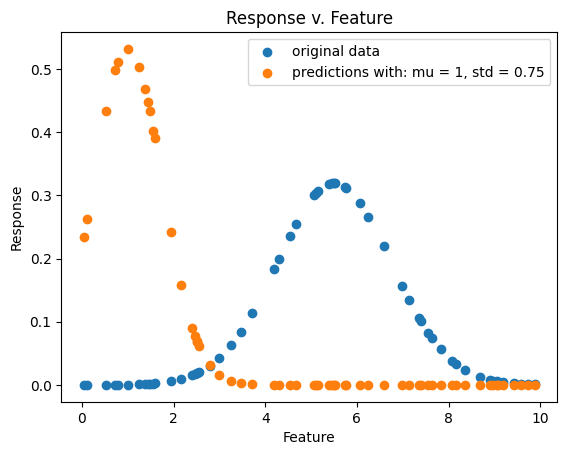

In [7]:
params = (1, 0.75)
y_pred = gaussian_cf.predict(X, params)

plt.scatter(X, y_true, label='original data')
plt.scatter(X, y_pred, label='predictions with: mu = 1, std = 0.75')
plt.xlabel('Feature')
plt.ylabel('Response')
plt.title('Response v. Feature')
plt.legend()
plt.show()

#### 7. Use the cost method to solve for the error and add this error to the plot’s title.

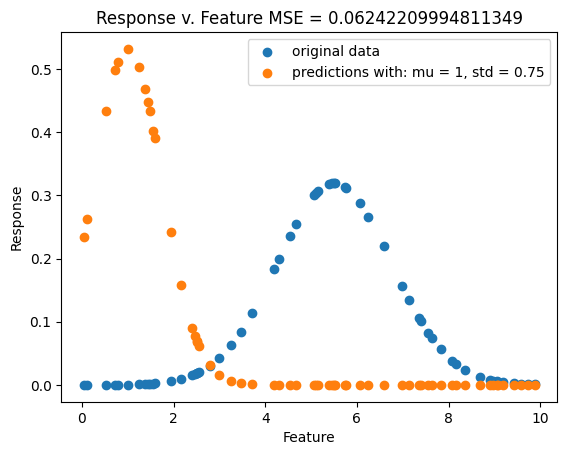

In [8]:
error = gaussian_cf.cost(params)

plt.scatter(X, y_true, label='original data')
plt.scatter(X, y_pred, label='predictions with: mu = 1, std = 0.75')
plt.xlabel('Feature')
plt.ylabel('Response')
plt.title(f'Response v. Feature MSE = {error}')
plt.legend()
plt.show()

#### **Grid Search to find model parameters**

#### 1. Create two new vectors that hold a set of values for each parameter (μ and σ)
The set of values should be evenly spaced so that you are sampling uniform regions in the “parameter space”. For this experiment, range your μ and σ vectors from 0 to 10 and 0.5 to 2 respectively. Sample at 100 divisions for μ and 50 divisions for σ. Hint: don’t forget about that numpy.linspace

In [9]:
mus = np.linspace(0, 10, 100)
sigmas = np.linspace(0.5, 2, 50)

#### 2. Calculate the error for each parameter set

In [10]:
xv, yv = np.meshgrid(mus, sigmas)
parameters = np.hstack([xv.reshape(-1, 1), yv.reshape(-1, 1)])
errors = np.zeros(parameters.shape[0])

for i in range(errors.shape[0]):
    errors[i] = gaussian_cf.cost(parameters[i])

#### 3. Plot your resulting 2-dimensional array of error values using a heatmap. Make sure to label your axis and legends! For a place to begin with heatmaps, look at seaborn.heatmap. Notice here that the color values for the heatmap represent error

Text(0.5, 23.52222222222222, 'Mu')

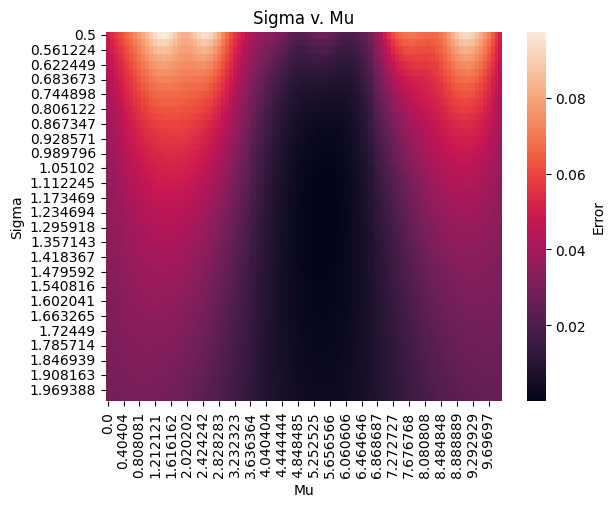

In [11]:
errors = errors.reshape(xv.shape)
m = np.round(mus, decimals=6)
s = np.round(sigmas, decimals=6)

error_param_df = pd.DataFrame(data=errors, index=s, columns=m) 

ax = plt.axes()
sns.heatmap(data=error_param_df, ax=ax, cbar_kws={'label' : 'Error'})
ax.set_title('Sigma v. Mu')
ax.set_ylabel('Sigma')
ax.set_xlabel('Mu')

#### 4. Using the results for the heatmap, pick a combination of parameters that produce a low error.

Low error when:

$\mu = 5.252525$ and $\sigma = 1.295918$

In [12]:
params_1 = (5.252525, 1.295918)       # mu, sigma
cost_1 = gaussian_cf.cost(params_1)
print(f'cost = {cost_1}')

cost = 0.0003298388502579964


#### 5. Use the selected parameters to calculate your model predictions and plot this output against the given data on a separate plot. Make sure to label the plot with the model error from using your choice of parameters.

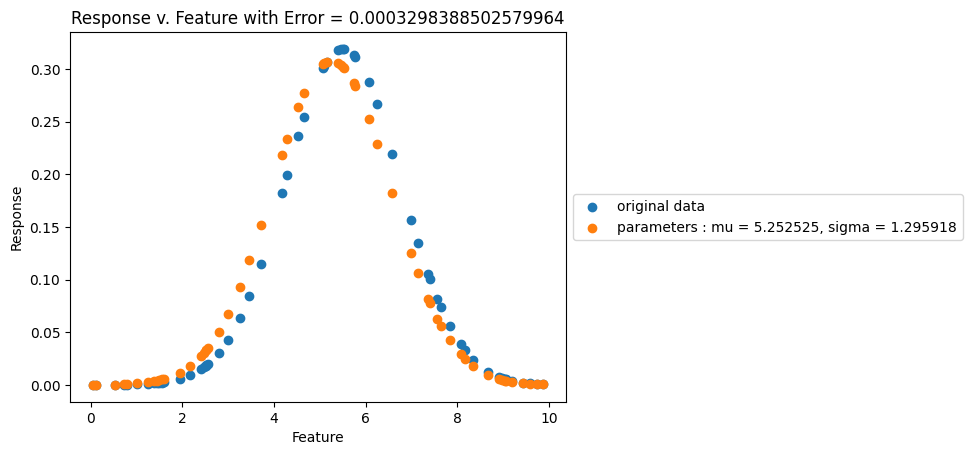

In [13]:
y_pred_1 = gaussian_cf.predict(X, params_1)

plt.scatter(X, y_true, label='original data')
plt.scatter(X, y_pred_1, label=f'parameters : mu = {params_1[0]}, sigma = {params_1[1]}')
plt.xlabel('Feature')
plt.ylabel('Response')
plt.title(f'Response v. Feature with Error = {cost_1}')
plt.legend(bbox_to_anchor=(1, 0.5), loc='center left')

#### **Experiment 2 - Redefined Grid Search (Gaussian Distribution)**

#### 1. Repeat the steps in Grid Search – Coarse using the same number of grid samples, but this time use:
6 ≥ $\mu$ ≥ 5

1.75 ≥ σ ≥ 1

In [14]:
mus_2 = np.linspace(5, 6, 100)
sigmas_2 = np.linspace(1, 1.75, 50)

xv2, yv2 = np.meshgrid(mus_2, sigmas_2)
parameters_2 = np.hstack([xv2.reshape(-1, 1), yv2.reshape(-1, 1)])
errors_2 = np.zeros(parameters_2.shape[0])

for i in range(errors_2.shape[0]):
    errors_2[i] = gaussian_cf.cost(parameters_2[i])

#### 2. Plot your resulting 2-dimensional array of error values using a heatmap. Through visual inspection of the heatmap, pick a combination of parameters that produce a low error.

Low error when: 

$\mu = 5.484848$ and $\sigma = 1.244898$

cost = 1.7151953622457497e-06
for mu = 5.484848 and sigma = 1.244898


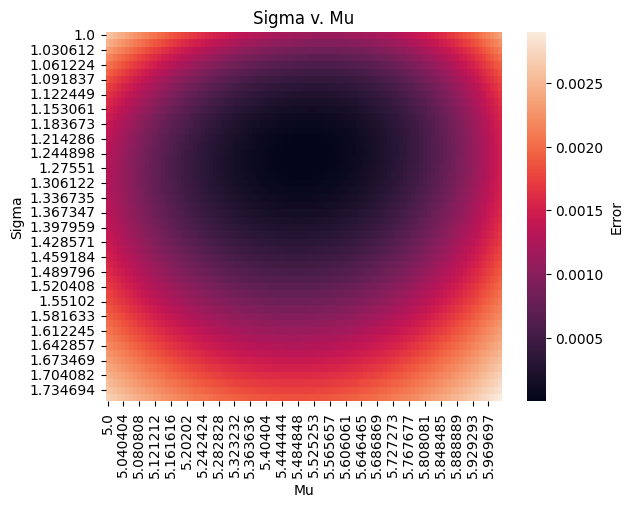

In [15]:
errors_2 = errors_2.reshape(xv2.shape)
m = np.round(mus_2, decimals=6)
s = np.round(sigmas_2, decimals=6)

error_param_df2 = pd.DataFrame(data=errors_2, index=s, columns=m) 

ax = plt.axes()
sns.heatmap(data=error_param_df2, ax=ax, cbar_kws={'label' : 'Error'})
ax.set_title('Sigma v. Mu')
ax.set_ylabel('Sigma')
ax.set_xlabel('Mu')

params_2 = (5.484848, 1.244898)
cost_2 = gaussian_cf.cost(params_2)
print(f'cost = {cost_2}\nfor mu = {params_2[0]} and sigma = {params_2[1]}')

#### 3. Use the selected parameters to calculate your model predictions and plot this output against the given data on a separate plot. Make sure to label the plot with the model error from using your choice of parameters.

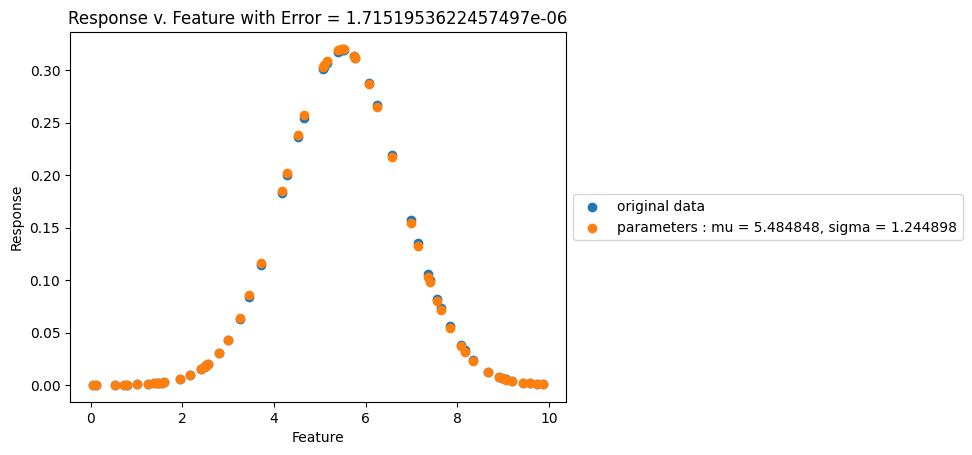

In [16]:
y_pred_2 = gaussian_cf.predict(X, params_2)

plt.scatter(X, y_true, label='original data')
plt.scatter(X, y_pred_2, label=f'parameters : mu = {params_2[0]}, sigma = {params_2[1]}')
plt.xlabel('Feature')
plt.ylabel('Response')
plt.title(f'Response v. Feature with Error = {cost_2}')
plt.legend(bbox_to_anchor=(1, 0.5), loc='center left')

#### 4. Using the argmin function in numpy, search through the 2-dimensional array of error values to find the minimum. Hint: What do the indices of this error matrix correspond to?

The indicies of the error matrix correspond to the pairs or points in parameter space such that $(\mu, \sigma)$.

In [17]:
min_indx = np.argmin(errors_2)
min_params = parameters_2[min_indx]
min_cost = gaussian_cf.cost(min_params)

print(f'minimum error = {min_cost}\nwith parameters : mu = {min_params[0]} and sigma = {min_params[1]}')

minimum error = 4.3307051270672867e-07
with parameters : mu = 5.505050505050505 and sigma = 1.2448979591836735


#### **Experiment 3 - 'Blind' Grid Search (Multivariate Linear Model)**

#### Instantiate the cost function that you created this week for the linear model using the advertisement.csv dataset.

#### 1. Load advertising.csv

In [18]:
ad_data = np.loadtxt('../Data/advertising.csv', delimiter=',', skiprows=1, usecols=(range(1, 6)))

#### 2. Store ad features and response into separate arrays

In [19]:
ad_X = ad_data[:, :4]
ad_true_y = ad_data[:, -1]

#### 3. Instantiate linear cost model for the advertising data

In [20]:
linear_cf = cf.LinearCostFunction(ad_X, ad_true_y)

#### 4. Plot model prediction versus response using a parameter set of [ $w_{0}$, $w_{1}$, $w_{2}$, $w_{3}$ ] as [ 0.1, 0.1, 0.1, 0.1 ]. On this same figure, plot the line of identity. The line of identity begins at the origin and has a slope = 1.

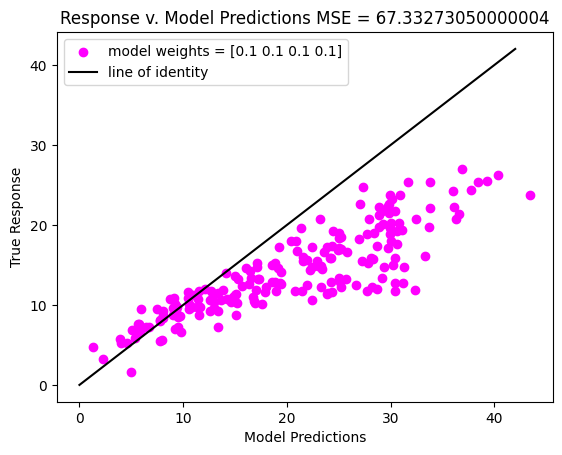

In [21]:
xs = np.linspace(0,42,100)
weights = np.array([0.1,0.1,0.1,0.1])
y_pred_ad = linear_cf.predict(ad_X, weights)
cost_ad = linear_cf.cost(weights)

plt.scatter(y_pred_ad, ad_true_y, c='magenta', label=f'model weights = {weights}')
plt.plot(xs, xs, c='k', label='line of identity')
    
plt.xlabel('Model Predictions')
plt.ylabel('True Response')
plt.title(f'Response v. Model Predictions MSE = {cost_ad}')
plt.legend()

#### 5. Perform a grid search over all four coefficients [ $w_{0}$, $w_{1}$, $w_{2}$, $w_{3}$ ] (using no more than 50 divisions in each dimension). 
Remember that you can have both positive and negative value coefficients in a linear model

In [22]:
w = np.linspace(-1, 1, 50)
w0, w1, w2, w3 = np.meshgrid(w, w, w, w)

weights_2 = np.hstack([w0.reshape(-1, 1), w1.reshape(-1, 1), w2.reshape(-1, 1), w3.reshape(-1, 1)])
errors_lin = np.zeros(weights_2.shape[0])

for i in range(errors_lin.shape[0]):
    errors_lin[i] = linear_cf.cost(weights_2[i])

#### Use the same argmin approach from experiment 2 to find the combination of model parameters that results in the lowest possible error.

In [23]:
min_indx_ad = np.argmin(errors_lin)
min_weights = weights_2[min_indx_ad]
min_cost_ad = linear_cf.cost(min_weights)

print(f'minimum error = {min_cost_ad}\nwith weights = {min_weights}')

minimum error = 4.795343148688009
with weights = [0.14285714 0.06122449 0.18367347 0.02040816]


#### Create another plot of the model prediction versus response using your found set of parameters and label the plot with the resulting error. Make sure to also plot the line of identity.

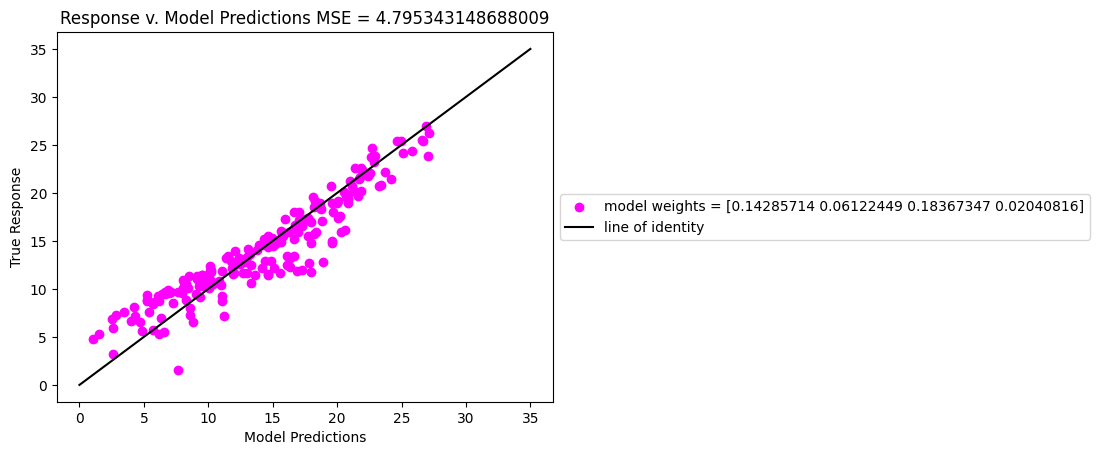

In [24]:
xs = np.linspace(0,35,100)
y_pred_min = linear_cf.predict(ad_X, min_weights)

plt.scatter(y_pred_min, ad_true_y, c='magenta', label=f'model weights = {min_weights}')
plt.plot(xs, xs, c='k', label='line of identity')
    
plt.xlabel('Model Predictions')
plt.ylabel('True Response')
plt.title(f'Response v. Model Predictions MSE = {min_cost_ad}')
plt.legend(bbox_to_anchor=(1, 0.5), loc='center left')